# Machine Learning Project 1
## Heart Disease Classification
### Heart Disease Data Set
https://archive.ics.uci.edu/ml/datasets/Heart+Disease
### Description
- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more [here](https://litfl.com/st-segment-ecg-library/))
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)


### General flow for using sklearn

In [ ]:
import pandas as pd # dataframe
import numpy as np  # list

# Data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

### Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/CSTU/ML/

Mounted at /content/drive
/content/drive/My Drive/CSTU/ML


In [ ]:
heart_data = pd.read_csv('./data/heart.csv')
heart_data.shape

(303, 14)

## Data wrangling

### Exploratory data analysis
Does thal column have missing values?

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heart_data.notnull().sum()

,0
age,303
sex,303
cp,303
trestbps,303
chol,303
fbs,303
restecg,303
thalach,303
exang,303
oldpeak,303


In [ ]:
heart_data.isnull().any().any()     # Returns True if any missing values exist, else False.

False

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### target: Heart disease (0 = no, 1 = yes)

In [ ]:
heart_data["target"].value_counts()

,count
target,
1,165
0,138


### Splitting the features and target

In [ ]:
X = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

### Data Analysis

## Exploring data relationships

In [ ]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

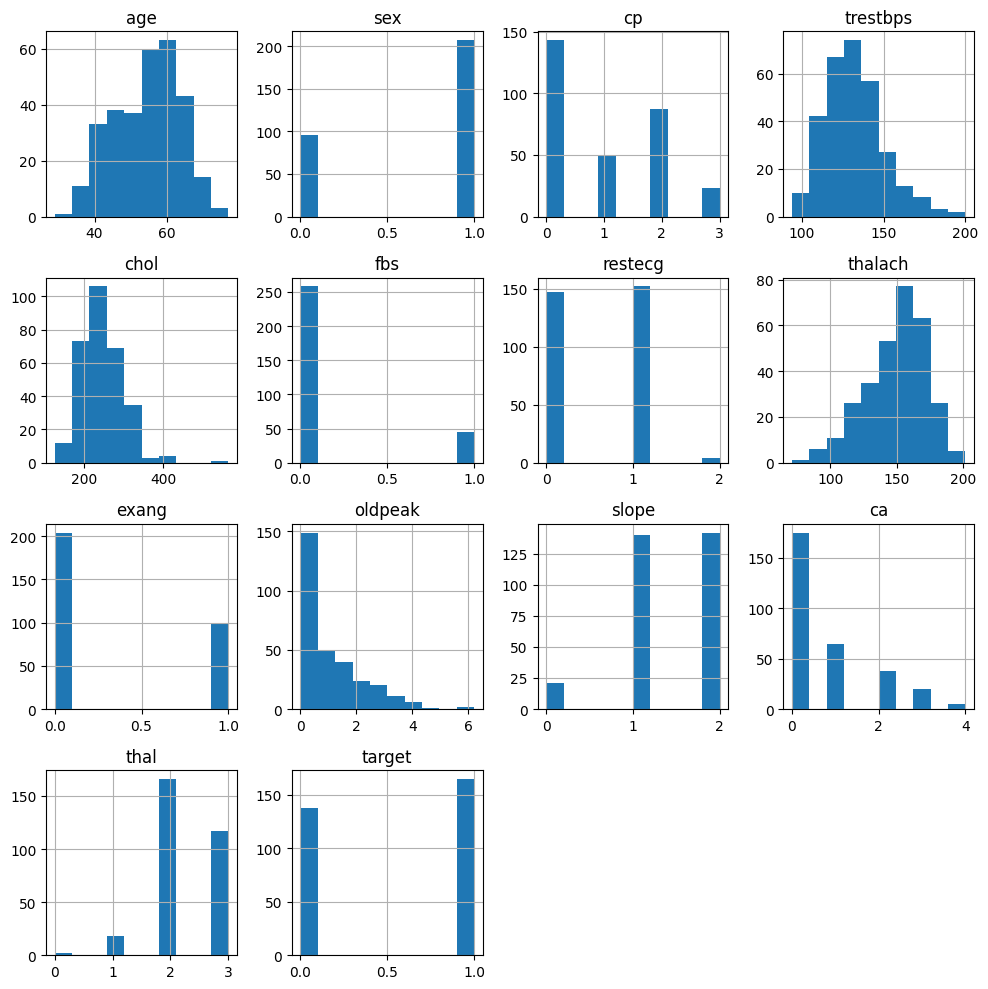

In [ ]:
# Histograms for numerical features
heart_data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

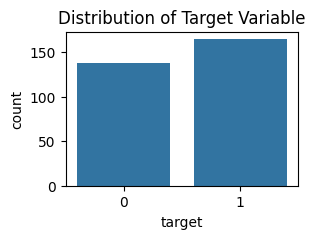

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(3, 2))
sns.countplot(x='target', data=heart_data)
plt.title("Distribution of Target Variable")
plt.show()

In [ ]:
# Correlation
heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Column cp, thalach, slope has positive effect on target

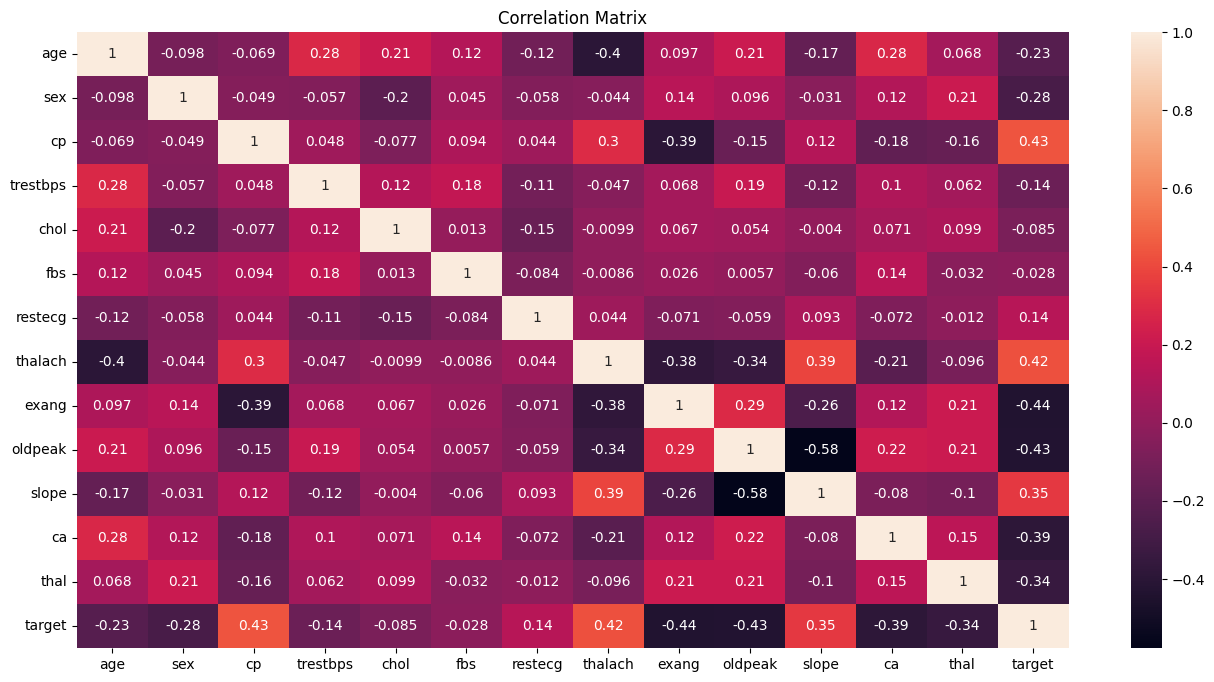

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(heart_data.corr(), annot = True)
plt.title("Correlation Matrix")
plt.show()

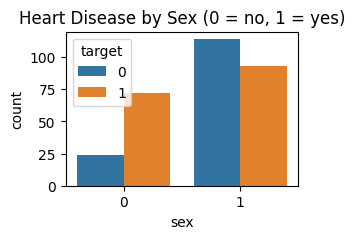

In [ ]:
# Explore categorical features with bar plots
plt.figure(figsize=(3, 2))
sns.countplot(x='sex', hue='target', data=heart_data)
plt.title('Heart Disease by Sex (0 = no, 1 = yes)')
plt.show()

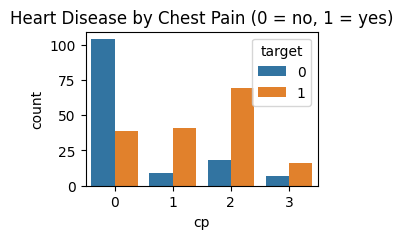

In [ ]:
plt.figure(figsize=(3, 2))
sns.countplot(x='cp', hue='target', data=heart_data)
plt.title('Heart Disease by Chest Pain (0 = no, 1 = yes)')
plt.show()

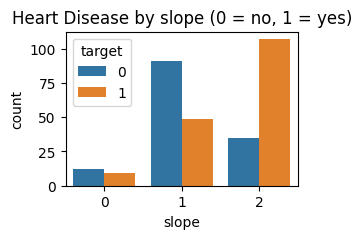

In [ ]:
plt.figure(figsize=(3, 2))
sns.countplot(x='slope', hue='target', data=heart_data)
plt.title('Heart Disease by slope (0 = no, 1 = yes)')
plt.show()

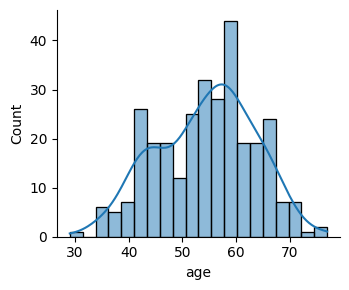

In [ ]:
sns.displot(heart_data['age'], bins=20, kde=True, height=3, aspect=1.2)
plt.show()

#### Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting the data into training data and test data
20% data use as test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


## Model Training
### Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with training data
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

## <font color='red'>**Scores of Logistic Regression Model**</font>

In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.87
Precision: 0.80
Recall: 0.97
F1 Score: 0.88


### Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

## <font color='red'>**Scores of Random Forest Model**</font>

In [ ]:
print(f"Accuracy of RF model: {accuracy_rf:.2f}")
print(f"Precision of RF model: {precision_rf:.2f}")
print(f"Recall of RF model: {recall_rf:.2f}")
print(f"F1 Score of RF model: {f1_rf:.2f}")

Accuracy of RF model: 0.92
Precision of RF model: 0.85
Recall of RF model: 1.00
F1 Score of RF model: 0.92


## Building a Predictive System
### target: Heart disease (0 = no, 1 = yes)


In [ ]:
import random
def generate_random_data():
  age = random.randint(20, 80)
  sex = random.randint(0, 1)
  cp = random.choice([1,2,3,4])
  trestbps = random.randint(90, 200)
  chol = random.randint(100, 600)
  fbs = random.randint(0, 1)
  restecg = random.randint(0, 2)
  thalach = random.randint(70, 200)
  exang = random.randint(0, 1)
  oldpeak = random.uniform(0.0, 6.2)
  slope = random.choice([1,2,3])
  ca = random.randint(0, 4)
  thal = random.choice([3,6,7])
  return [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]


### Predict test 1 on Logic Regression model

In [ ]:
input_data = generate_random_data()
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The person does not have a heart disease.')
else:
  print('The person has a heart disease.')

[0]
The person does not have a heart disease.


### Predict test 2 on Random Forest model

In [ ]:
input_data = generate_random_data()
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The person does not have a heart disease.')
else:
  print('The person has a heart disease.')

[1]
The person has a heart disease.
